### Curso de Python para Finanças Quantitativas

#### Aula 8 - Price Action e análise de dados
#### Autor: Leandro Guerra - Outspoken Market
#### Download em: https://www.outspokenmarket.com/pythonfinancasquantitativas.html

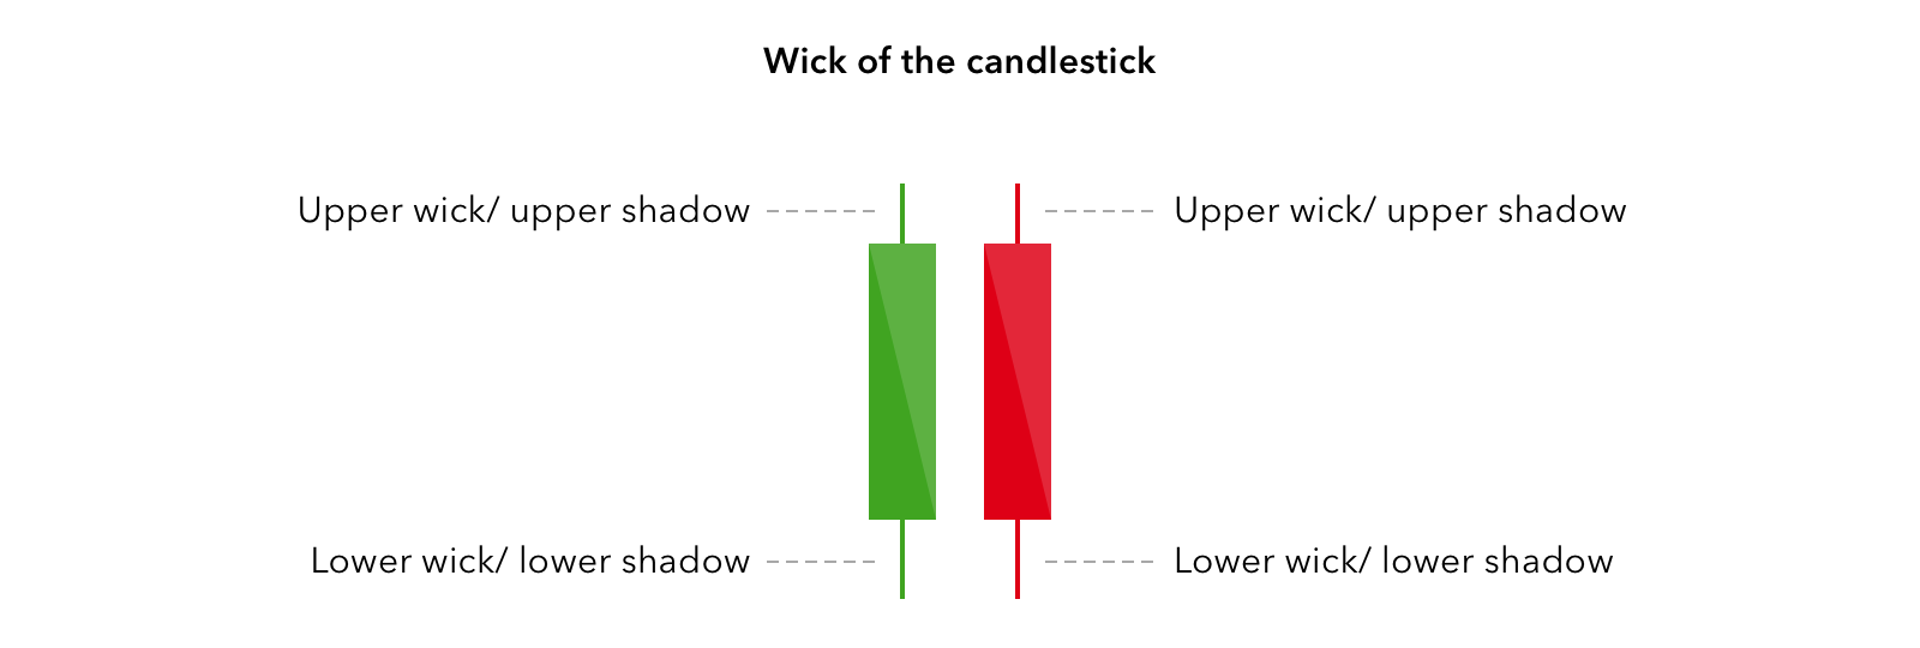

In [41]:
import pandas as pd
import numpy as np
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
plt.style.use("fivethirtyeight")
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

In [23]:
# Carrega a base

df1 = yf.download("^BVSP", "2020-01-01", "2021-12-31")

df1

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,115652.0,118573.0,115649.0,118573.0,118573.0,5162700
2020-01-03,118564.0,118792.0,117341.0,117707.0,117707.0,6834500
2020-01-06,117707.0,117707.0,116269.0,116878.0,116878.0,6570000
2020-01-07,116872.0,117076.0,115965.0,116662.0,116662.0,4854100
2020-01-08,116667.0,117335.0,115693.0,116247.0,116247.0,5910500
...,...,...,...,...,...,...
2021-12-23,105251.0,105453.0,104637.0,104891.0,104891.0,7283600
2021-12-27,104892.0,105694.0,104798.0,105531.0,105531.0,7594900
2021-12-28,105555.0,105652.0,104503.0,104864.0,104864.0,7509000


In [24]:
# Construção dos alvos

# Alvo 1 - Retorno
df1["Retorno"] = df1["Adj Close"].pct_change(1)*100
df1["Alvo1"] = df1["Retorno"].shift(-1)

# Alvo 5 - Retorno
df1["Retorno5"] = df1["Adj Close"].pct_change(5)*100
df1["Alvo5"] = df1["Retorno5"].shift(-5)

# Alvo 10 - Retorno
df1["Retorno10"] = df1["Adj Close"].pct_change(10)*100
df1["Alvo10"] = df1["Retorno10"].shift(-10)

# Criacao dos alvos categoricos
df1["Alvo1_cat"] = np.where(df1["Alvo1"] > 0 , 1, 0)
df1["Alvo5_cat"] = np.where(df1["Alvo5"] > 0 , 1, 0)
df1["Alvo10_cat"] = np.where(df1["Alvo10"] > 0 , 1, 0)

In [25]:
df1.head()

,Open,High,Low,Close,Adj Close,Volume,Retorno,Alvo1,Retorno5,Alvo5,Retorno10,Alvo10,Alvo1_cat,Alvo5_cat,Alvo10_cat
Date,,,,,,,,,,,,,,,
2020-01-02,115652.0,118573.0,115649.0,118573.0,118573.0,5162700,NaN,-0.730352,NaN,-2.214669,NaN,-1.576244,0,0,0
2020-01-03,118564.0,118792.0,117341.0,117707.0,117707.0,6834500,-0.730352,-0.704291,NaN,-1.872446,NaN,0.655016,0,0,1
2020-01-06,117707.0,117707.0,116269.0,116878.0,116878.0,6570000,-0.704291,-0.184808,NaN,0.382450,NaN,1.697497,0,1,1
2020-01-07,116872.0,117076.0,115965.0,116662.0,116662.0,4854100,-0.184808,-0.355729,NaN,0.831462,NaN,0.312012,0,1,1
2020-01-08,116667.0,117335.0,115693.0,116247.0,116247.0,5910500,-0.355729,-0.258071,NaN,0.143660,NaN,1.844349,0,1,1


In [26]:
# Cria os pavios (wicks)

# Pavio superior
df1["Wick_upper"] = np.where(df1["Retorno"] > 0
                             , (df1["High"]/df1["Adj Close"]-1)*100
                             , (df1["High"]/df1["Open"]-1)*100)
# Pavio inferior
df1["Wick_lower"] = np.where(df1["Retorno"] > 0
                             , (df1["Open"]/df1["Low"]-1)*100
                             , (df1["Adj Close"]/df1["Low"]-1)*100)

# Direção do dia atual
df1["Dir_D"] = np.where(df1["Retorno"] > 0, "Alta", "Baixa")

In [27]:
# Visualizando as estatísticas dos Wicks

df1[["Wick_upper", "Wick_lower"]].describe()

,Wick_upper,Wick_lower
count,495.000000,495.000000
mean,0.485167,0.506539
std,0.614562,0.801165
min,0.000000,0.000000
25%,0.049000,0.005068
50%,0.304741,0.297238
75%,0.686543,0.629945
max,5.710816,8.416138


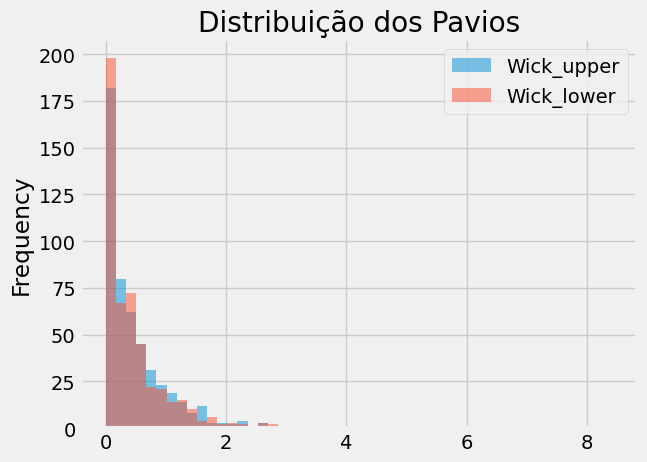

In [28]:
# Visualizando a distribuiçao dos Wicks

df1[["Wick_upper", "Wick_lower"]].plot.hist(bins = 50
                            , alpha = 0.5
                            , title = "Distribuição dos Pavios");

In [29]:
# Qual é a média do tamanho dos pavios nos dias de alta ou baixa

pd.pivot_table(df1, index = "Dir_D"
               , aggfunc = {"Wick_upper" : np.mean
                            , "Wick_lower": np.mean})

,Wick_lower,Wick_upper
Dir_D,,
Alta,0.359024,0.517810
Baixa,0.665831,0.449917


In [30]:
# Qual é a média dos retornos dos dias sucessivos

pd.pivot_table(df1, index = "Dir_D"
               , aggfunc = {"Alvo1" : np.mean
                            , "Alvo5": np.mean
                            , "Alvo10": np.mean})

,Alvo1,Alvo10,Alvo5
Dir_D,,,
Alta,-0.215377,-0.033834,-0.210185
Baixa,0.230822,0.052663,0.191724


In [31]:
# Não diz muito. Vamos ver agora em relação aos pavios
# Mas antes, vamos dividir os pavios em intervalos

pd.qcut(df1["Wick_upper"], 3)

Date
2020-01-02     (0.537, 5.711]
2020-01-03     (0.144, 0.537]
2020-01-06    (-0.001, 0.144]
2020-01-07     (0.144, 0.537]
2020-01-08     (0.537, 5.711]
                   ...       
2021-12-23     (0.144, 0.537]
2021-12-27     (0.144, 0.537]
2021-12-28    (-0.001, 0.144]
2021-12-29     (0.144, 0.537]
2021-12-30     (0.144, 0.537]
Name: Wick_upper, Length: 495, dtype: category
Categories (3, interval[float64, right]): [(-0.001, 0.144] < (0.144, 0.537] < (0.537, 5.711]]

In [32]:
pd.qcut(df1["Wick_upper"], 3, labels = ["Baixo", "Médio", "Alto"])

Date
2020-01-02     Alto
2020-01-03    Médio
2020-01-06    Baixo
2020-01-07    Médio
2020-01-08     Alto
              ...  
2021-12-23    Médio
2021-12-27    Médio
2021-12-28    Baixo
2021-12-29    Médio
2021-12-30    Médio
Name: Wick_upper, Length: 495, dtype: category
Categories (3, object): ['Baixo' < 'Médio' < 'Alto']

In [33]:
# Atribuímos os intervalos ao nosso dataframe

df1["Wick_upper_cat"] = pd.qcut(df1["Wick_upper"], 3, labels = ["Baixo", "Médio", "Alto"])
df1["Wick_lower_cat"] = pd.qcut(df1["Wick_lower"], 3, labels = ["Baixo", "Médio", "Alto"])

In [34]:
# Agora temos algo mais significativo

# Intervalos dos pavios de alta
pd.pivot_table(df1, index = "Wick_upper_cat"
               , aggfunc = {"Alvo1" : [np.mean, np.sum]
                            , "Alvo5": [np.mean, np.sum]
                            , "Alvo10": [np.mean, np.sum]})

Alvo1               Alvo10                 Alvo5           
                    mean        sum      mean         sum      mean        sum
Wick_upper_cat                                                                
Baixo           0.072612  11.980996 -0.710921 -115.169254 -0.359809 -59.008720
Médio          -0.089004 -14.596737  0.200066   31.810532 -0.071073 -11.442709
Alto            0.014637   2.415066  0.530589   87.016536  0.375209  61.909424

In [35]:
# Intervalos dos pavios de baixa
pd.pivot_table(df1, index = "Wick_lower_cat"
               , aggfunc = {"Alvo1" : [np.mean, np.sum]
                            , "Alvo5": [np.mean, np.sum]
                            , "Alvo10": [np.mean, np.sum]})

Alvo1               Alvo10                Alvo5           
                    mean        sum      mean        sum      mean        sum
Wick_lower_cat                                                               
Baixo           0.064141  10.519186  0.425122  68.869747  0.142772  23.414586
Médio           0.094806  15.643002 -0.087067 -14.017758 -0.039138  -6.301161
Alto           -0.159775 -26.362863 -0.316013 -51.194175 -0.155487 -25.655430

In [36]:
# Dá para ficar melhor? Claro!
# Vamos inserir a direção do dia atual e ter uma visão mais completa

# Analisando o pavio de alta
pd.pivot_table(df1, index = ["Dir_D", "Wick_upper_cat"]
               , aggfunc = {"Alvo1" : [np.mean, np.sum]
                            , "Alvo5": [np.mean, np.sum]
                            , "Alvo10": [np.mean, np.sum]})

Alvo1               Alvo10                 Alvo5  \
                          mean        sum      mean         sum      mean   
Dir_D Wick_upper_cat                                                        
Alta  Baixo          -0.150881 -10.410798 -0.150652  -10.395017 -0.033309   
      Médio          -0.245489 -24.794366  0.290132   28.723020 -0.129552   
      Alto           -0.231759 -19.931252 -0.316329  -26.887955 -0.445855   
Baixa Baixo           0.233248  22.391793 -1.126605 -104.774237 -0.596951   
      Médio           0.161867  10.197629  0.051459    3.087512  0.024796   
      Alto            0.282865  22.346318  1.441829  113.904491  1.269025   

                                  
                             sum  
Dir_D Wick_upper_cat              
Alta  Baixo            -2.298339  
      Médio           -12.955245  
      Alto            -38.343560  
Baixa Baixo           -56.710381  
      Médio             1.512536  
      Alto            100.252984

In [37]:
# Analisando o pavio de baixa

pd.pivot_table(df1, index = ["Wick_lower_cat", "Dir_D"]
               , aggfunc = {"Alvo1" : [np.mean, np.sum]
                            , "Alvo5": [np.mean, np.sum]
                            , "Alvo10": [np.mean, np.sum]})

Alvo1               Alvo10                Alvo5  \
                          mean        sum      mean        sum      mean   
Wick_lower_cat Dir_D                                                       
Baixo          Alta  -0.105701 -14.481050  0.355774  48.029461 -0.039411   
               Baixa  0.925935  25.000236  0.771862  20.840286  1.067182   
Médio          Alta  -0.302590 -18.155399 -1.105306 -65.213053 -1.024797   
               Baixa  0.321890  33.798401  0.501915  51.195295  0.530999   
Alto           Alta  -0.381355 -22.499966  0.146163   8.623639  0.207885   
               Baixa -0.036442  -3.862897 -0.580755 -59.817814 -0.357742   

                                 
                            sum  
Wick_lower_cat Dir_D             
Baixo          Alta   -5.399328  
               Baixa  28.813915  
Médio          Alta  -60.463031  
               Baixa  54.161870  
Alto           Alta   12.265215  
               Baixa -37.920646

In [38]:
# Tem como ficar melhor ainda?
# Seguramente. Vamos adicionar uma lógica com uma média movel de 10 dias

df1["MM"] = df1["Adj Close"].rolling(window = 10).mean()
df1["MM_Ref"] = np.where(df1["Adj Close"] > df1["MM"]
                             , "Acima MM"
                             , "Abaixo MM")

pd.pivot_table(df1, index = ["MM_Ref", "Dir_D", "Wick_lower_cat"]
               , aggfunc = {"Alvo1" : [np.mean, np.sum]
                            , "Alvo5": [np.mean, np.sum]
                            , "Alvo10": [np.mean, np.sum]})

Alvo1               Alvo10             \
                                    mean        sum      mean        sum   
MM_Ref    Dir_D Wick_lower_cat                                             
Abaixo MM Alta  Baixo           0.007081   0.261989 -0.673323 -24.239617   
                Médio          -0.704489 -10.567337 -5.758900 -80.624598   
                Alto           -1.139702 -30.771944 -1.612385 -43.534401   
          Baixa Baixo           1.247157  23.695987  0.515927   9.802618   
                Médio           0.266063  17.826209 -0.030945  -1.980502   
                Alto            0.096679   6.767547 -1.368833 -91.711785   
Acima MM  Alta  Baixo          -0.147430 -14.743039  0.729991  72.269079   
                Médio          -0.168624  -7.588062  0.342479  15.411545   
                Alto            0.258499   8.271978  1.629939  52.158041   
          Baixa Baixo           0.163031   1.304249  1.379708  11.037668   
                Médio           0.420321  15.972192  1.399363  53.175797   
                Alto           -0.295290 -10.630443  0.885944  31.893971   

                                   Alvo5             
                                    mean        sum  
MM_Ref    Dir_D Wick_lower_cat                       
Abaixo MM Alta  Baixo          -0.702072 -25.976674  
                Médio          -3.588390 -50.237462  
                Alto           -0.259358  -7.002675  
          Baixa Baixo           1.184013  22.496250  
                Médio           0.112566   7.204242  
                Alto           -0.604396 -42.307746  
Acima MM  Alta  Baixo           0.205773  20.577346  
                Médio          -0.227235 -10.225569  
                Alto            0.602122  19.267890  
          Baixa Baixo           0.789708   6.317664  
                Médio           1.235727  46.957628  
                Alto            0.121864   4.387101

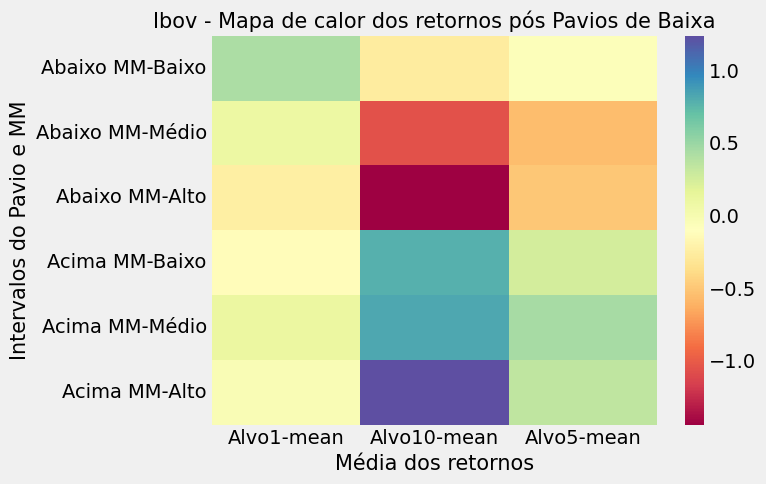

In [39]:
# Ok, agora é impossível ficar melhor?
# Não é. Tem como ficar ainda melhor sim: vamos visualizar!

analise_lower = pd.pivot_table(df1, index = ["MM_Ref", "Wick_lower_cat"]
                         , aggfunc = {"Alvo1" : [np.mean]
                                      , "Alvo5": [np.mean]
                                      , "Alvo10": [np.mean]})

analise_upper = pd.pivot_table(df1, index = ["MM_Ref", "Wick_upper_cat"]
                         , aggfunc = {"Alvo1" : [np.mean]
                                      , "Alvo5": [np.mean]
                                      , "Alvo10": [np.mean]})

sns.heatmap(analise_lower, cmap = "Spectral")
plt.title("Ibov - Mapa de calor dos retornos pós Pavios de Baixa"
          , fontsize = 15)
plt.xlabel("Média dos retornos", fontsize = 15)
plt.ylabel("Intervalos do Pavio e MM", fontsize = 15);

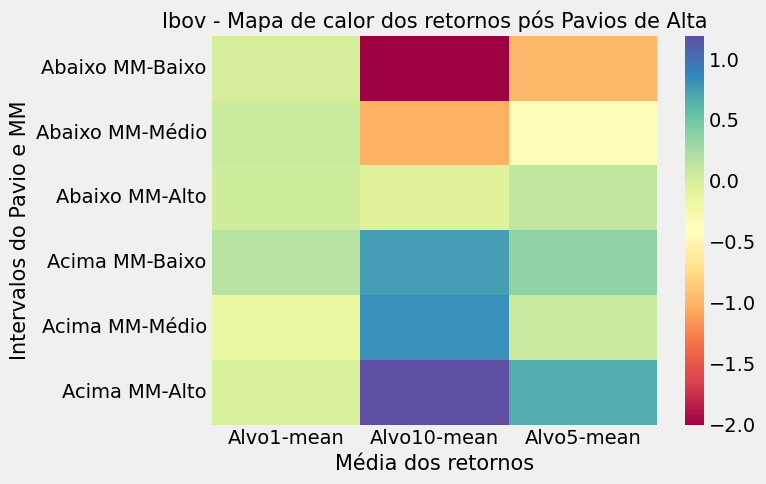

In [40]:
sns.heatmap(analise_upper, cmap = "Spectral")
plt.title("Ibov - Mapa de calor dos retornos pós Pavios de Alta"
          , fontsize = 15)
plt.xlabel("Média dos retornos", fontsize = 15)
plt.ylabel("Intervalos do Pavio e MM", fontsize = 15);